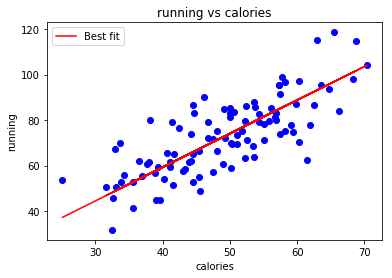

In [33]:
# The math of inteligence, prof. Siraj Raval
# https://www.youtube.com/watch?v=xRJCOz3AfYY&index=1&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D

from numpy import *
import matplotlib.pyplot as plt

def importdata():
    points = genfromtxt('dataMOI1.csv', delimiter=',')
    return points

def error(m, b, points):
    totalError = 0
    for point in range(0, len(points)):
        x = points[point, 0]
        y = points[point, 1]
        totalError += ((y - (m * x + b)) ** 2) / float(len(points))
    return totalError

def stepGradDesc(m, b, points, eta):
    m_gradient = 0
    b_gradient = 0
    for point in range(0, len(points)):
        x = points[point, 0]
        y = points[point, 1]
        m_gradient += - (2 / float(len(points))) * x * (y - (m * x + b))
        b_gradient += - (2 / float(len(points))) * (y - (m * x + b))
    m -= eta * m_gradient
    b -= eta * b_gradient
    return m, b

def GradDescRunner(m, b, points, eta, nIter):
    for i in range(nIter):
        m, b = stepGradDesc(m, b, points, eta)
        #print(error(m, b, points))
    return m, b

def show_results(points, m, b):
    x = points[:, 0]
    y = points[:, 1]
    plt.title('running vs calories')
    plt.scatter(x, y, color='blue')
    plt.plot(x, m * x + b, color='red', label='Best fit')
    plt.xlabel('calories')
    plt.ylabel('running')
    plt.legend()
    return plt.show()

m, b = (GradDescRunner(0, 0, importdata(), 0.0001, 1000)) 

show_results(importdata(), m, b)

